In [22]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#allow plots to display
%matplotlib inline

#code to allow for font control if desired
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['font.size'] = 18

#import file
pokemon = pd.read_csv("./Pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [0]:
#clean datafile, remove legendary and mega evolutions to remove outliers. reduce to only gen 1

#isolate gen 1:
pokemon1 = pokemon[pokemon['Generation'] == 1]

#remove legendary:
pokemon1_NLeg = pokemon1[pokemon1['Legendary'] == False]

#remove mega:
pokemon1_NLegv2 = pokemon1_NLeg[~pokemon1_NLeg['Name'].str.contains("Mega")]


In [18]:
#Duplicate the dataframe and then swap the type 1 and type 2 columns, then merge the two dataframes

#copy:
pokemon_copy = pokemon1_NLegv2.copy()

#swap columns
pokemon_copy.rename(columns={'Type 1':'Type 2',
                          'Type 2':'Type 1',}, 
                 inplace=True)

#create a list of both copies
frames = [pokemon1_NLegv2, pokemon_copy]

#combine both
combined_types = pd.concat(frames)

#doublecheck that the end of the new dataset has the types swapped
combined_types.tail()

#turns out both sets weren't in the same order, so pandas alphabetized the columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


,#,Attack,Defense,Generation,HP,Legendary,Name,Sp. Atk,Sp. Def,Speed,Total,Type 1,Type 2
155,143,110,65,1,160,False,Snorlax,65,110,30,540,NaN,Normal
159,147,64,45,1,41,False,Dratini,50,50,50,300,NaN,Dragon
160,148,84,65,1,61,False,Dragonair,70,70,70,420,NaN,Dragon
161,149,134,95,1,91,False,Dragonite,100,100,80,600,Flying,Dragon
165,151,100,100,1,100,False,Mew,100,100,100,600,NaN,Psychic


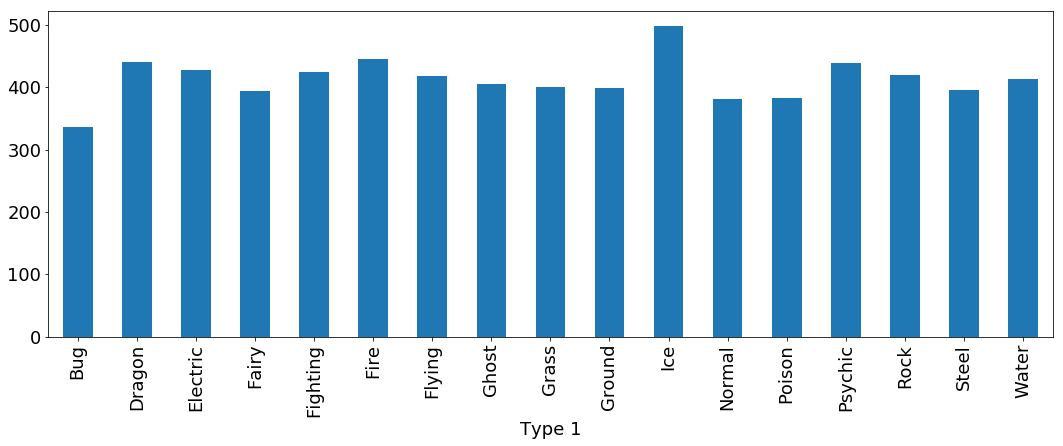

In [19]:
#create a chart of average stats by type. note, some have two types!!!!!


total_by_type = combined_types.groupby("Type 1")['Total'].mean()
total_by_type.plot(kind='bar')

In [0]:
#this portion just checks how many unique combinations of different types there are. ended up not using
#pokemon['combined'] = pokemon['Type 1'] + pokemon['Type 2']

#print(pokemon['combined'].nunique())
#pokemon['combined'].unique()

In [21]:
total_by_typeDF = pd.DataFrame(total_by_type)

strongest_type = total_by_typeDF.sort_values(by=['Total'],ascending = False)

print(f"Strongest Type = {strongest_type.head(1).index[0]}")

#was also the strongest by type when only taking type 1 into consideration

Strongest Type = Ice


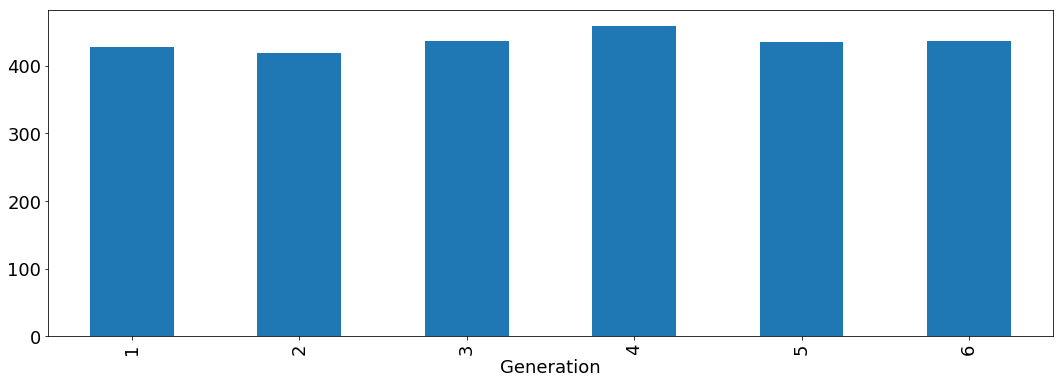

In [24]:
total_by_generation = pokemon.groupby("Generation")['Total'].mean()
total_by_generation.plot(kind='bar')

            Total  Attack  Defense  Sp. Atk  Sp. Def  Speed
Generation                                                 
1           426.8    76.6     70.9     71.8     69.1   72.6
2           418.3    72.0     73.4     65.9     73.9   61.8
3           436.2    81.6     74.1     75.8     71.2   66.9
4           459.0    82.9     78.1     76.4     77.2   71.3
5           435.0    82.1     72.3     72.0     68.7   68.1
6           436.4    75.8     76.7     74.3     74.9   66.4


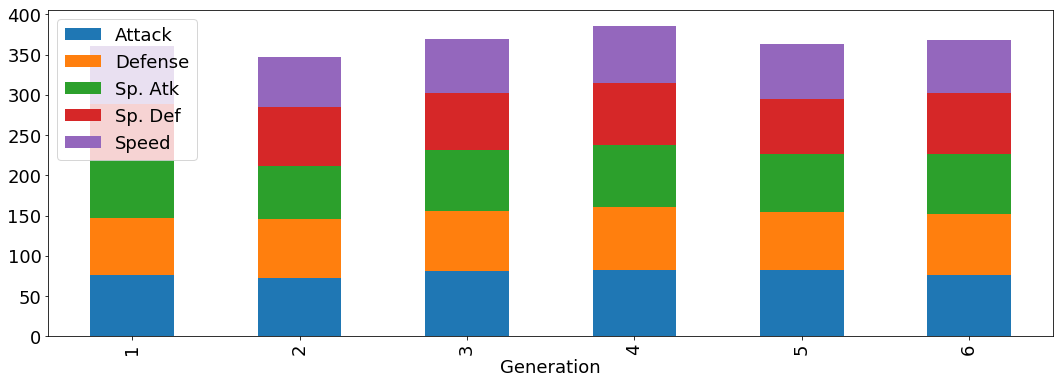

In [33]:

#find average of each stat by generation, to break down the previous graph and find out what's tipping the scale
total_by_generation_2 = pokemon.groupby("Generation")['Total','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed'].mean()

#round the mean stats so they're more managable
rounded_total_by_generation_2 = total_by_generation_2.round(1)
print(rounded_total_by_generation_2)

total_by_generation_2.loc[:,['Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].plot.bar(stacked=True,)

